---
author:
- 'Adrian E. Feiguin', modified by Tom Kelley

title: 'Computational Physics'
...

Ordinary differential equations
=========================================

Let’s consider a simple 1st order equation: 
$$\frac{dy}{dx}=f(x,y)$$

To solve this equation with a computer we need to **discretize** the differences: we
have to convert the differential equation into a “**finite differences**” equation. The simplest
solution is Euler’s method.

Euler’s method
--------------

Suppose that at a point $x_0$, the function $f$ has a value $y_0$. We
want to find the approximate value of $y$ in a point $x_1$ close to
$x_0$, $x_1=x_0+\Delta x$, with $\Delta x$ small. We assume that $f$,
the rate of change of $y$, is constant in this interval $\Delta x$.
Therefore we find: $$\begin{eqnarray}
&& dx \approx \Delta x &=&x_1-x_0, \\
&& dy \approx \Delta y &=&y_1-y_0,\end{eqnarray}$$ with
$y_1=y(x_1)=y(x_0+\Delta x)$. Then we re-write the differential equation in terms of discrete differences as:
$$\frac{\Delta y}{\Delta x}=f(x,y)$$ or 
$$\Delta y = f(x,y)\Delta x$$
and approximate the value of $y_1$ as
$$y_1=y_0+f(x_0,y_0)(x_1-x_0)$$ We can generalize this formula to find
the value of $y$ at $x_2=x_1+\Delta x$ as
$$y_{2}=y_1+f(x_1,y_1)\Delta x,$$ or in the general case:
$$y_{n+1}=y_n+f(x_n,y_n)\Delta x$$

This is a good approximation as long as $\Delta x$ is “small”. What is
small? Depends on the problem, but it is basically defined by the “rate
of change”, or “smoothness” of $f$. $f(x)$ has to behave smoothly and
without rapid variations in the interval $\Delta x$.

Notice that Euler’s method is equivalent to a 1st order Taylor expansion
about the point $x_0$. The “local error” calculating $x_1$ is then
$O(\Delta x^2)$. If we use the method $N$ times to calculate $N$
consecutive points, the propagated “global” error will be
$NO(\Delta x^2)\approx O(\Delta 
x)$. This error decreases linearly with decreasing step, so we need to
halve the step size to reduce the error in half. The numerical work for
each step consists of a single evaluation of $f$.

### Exercise 1: Newton’s law of cooling 

If the temperature difference between an object and its surroundings is
small, the rate of change of the temperature of the object is
proportional to the temperature difference: $$\frac{dT}{dt}=-r(T-T_s),$$
where $T$ is the temperature of the body, $T_s$ is the temperature of
the environment, and $r$ is a “cooling constant” that depends on the
heat transfer mechanism, the contact area with the environment and the
thermal properties of the body. The minus sign appears because if
$T>T_s$, the temperature must decrease.

Write a program to calculate the temperature of a body at a time $t$,
given the cooling constant $r$ and the temperature of the body at time
$t=0$. Plot the results for $r=0.1\frac{1}{min}$; $T_s=83^{\circ} C$, $T_0=10^{\circ}$
using different intervals $\Delta t$ and compare with exact (analytical)
results.

In [3]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 60. # maximum time
nsteps = int(tmax/dt)  # number of steps

In [4]:
T = T0
for i in range(1,nsteps+1):
    new_T = T - r*(T-Ts)*dt
    T = new_T
    print (i,i*dt, T)
    # we can also do t = t - r*(t-ts)*dt, it would save some memory and processing time.
    

1 0.05 10.365
2 0.1 10.728175
3 0.15000000000000002 11.089534125
4 0.2 11.449086454375
5 0.25 11.806841022103125
6 0.30000000000000004 12.16280681699261
7 0.35000000000000003 12.516992782907646
8 0.4 12.869407818993109
9 0.45 13.220060779898143
10 0.5 13.568960475998653
11 0.55 13.916115673618659
12 0.6000000000000001 14.261535095250565
13 0.65 14.605227419774312
14 0.7000000000000001 14.94720128267544
15 0.75 15.287465276262063
16 0.8 15.626027949880752
17 0.8500000000000001 15.962897810131349
18 0.9 16.298083321080693
19 0.9500000000000001 16.63159290447529
20 1.0 16.963434939952915
21 1.05 17.29361776525315
22 1.1 17.622149676426883
23 1.1500000000000001 17.94903892804475
24 1.2000000000000002 18.274293733404527
25 1.25 18.597922264737505
26 1.3 18.919932653413817
27 1.35 19.240332990146747
28 1.4000000000000001 19.559131325196013
29 1.4500000000000002 19.876335668570032
30 1.5 20.191953990227184
31 1.55 20.505994220276047
32 1.6 20.818464249174667
33 1.6500000000000001 21.129371927

489 24.450000000000003 76.70770109622738
490 24.5 76.73916259074625
491 24.55 76.77046677779252
492 24.6 76.80161444390356
493 24.650000000000002 76.83260637168404
494 24.700000000000003 76.86344333982562
495 24.75 76.8941261231265
496 24.8 76.92465549251087
497 24.85 76.9550322150483
498 24.900000000000002 76.98525705397306
499 24.950000000000003 77.0153307687032
500 25.0 77.04525411485967
501 25.05 77.07502784428537
502 25.1 77.10465270506394
503 25.150000000000002 77.13412944153862
504 25.200000000000003 77.16345879433092
505 25.25 77.19264150035927
506 25.3 77.22167829285748
507 25.35 77.25056990139319
508 25.400000000000002 77.27931705188622
509 25.450000000000003 77.3079204666268
510 25.5 77.33638086429366
511 25.55 77.36469895997219
512 25.6 77.39287546517232
513 25.650000000000002 77.42091108784646
514 25.700000000000003 77.44880653240723
515 25.75 77.4765624997452
516 25.8 77.50417968724648
517 25.85 77.53165878881025
518 25.900000000000002 77.5590004948662
519 25.950000000000

989 49.45 82.48672546568073
990 49.5 82.48929183835233
991 49.550000000000004 82.49184537916057
992 49.6 82.49438615226477
993 49.650000000000006 82.49691422150345
994 49.7 82.49942965039592
995 49.75 82.50193250214394
996 49.800000000000004 82.50442283963322
997 49.85 82.50690072543506
998 49.900000000000006 82.50936622180788
999 49.95 82.51181939069885
1000 50.0 82.51426029374535
1001 50.050000000000004 82.51668899227663
1002 50.1 82.51910554731525
1003 50.150000000000006 82.52151001957867
1004 50.2 82.52390246948077
1005 50.25 82.52628295713338
1006 50.300000000000004 82.5286515423477
1007 50.35 82.53100828463596
1008 50.400000000000006 82.53335324321277
1009 50.45 82.5356864769967
1010 50.5 82.53800804461171
1011 50.550000000000004 82.54031800438865
1012 50.6 82.5426164143667
1013 50.650000000000006 82.54490333229487
1014 50.7 82.54717881563339
1015 50.75 82.54944292155523
1016 50.800000000000004 82.55169570694746
1017 50.85 82.55393722841272
1018 50.900000000000006 82.556167542270

Let's try plotting the results. We first need to import the required libraries and methods

In [1]:
#%matplotlib inline
import numpy as np
from matplotlib import pyplot 

Next, we create numpy arrays to store the (x,y) values 

In [5]:
my_time = np.zeros(nsteps)
my_temp = np.zeros(nsteps)

We have to re write the loop to store the values in the arrays. Remember that numpy arrays start from 0.

In [6]:
T = T0
my_temp[0] = T0
for i in range(1,nsteps):
    T = T - r*(T-Ts)*dt
    my_time[i] = i*dt
    my_temp[i] = T
    

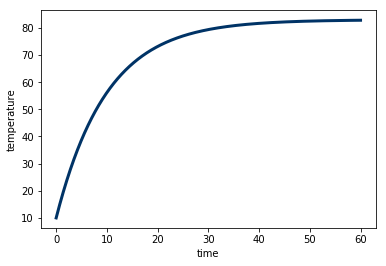

In [7]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
pyplot.xlabel('time')
pyplot.ylabel('temperature');

We could have saved effort by defining

In [8]:
my_time = np.linspace(0.,tmax,nsteps)

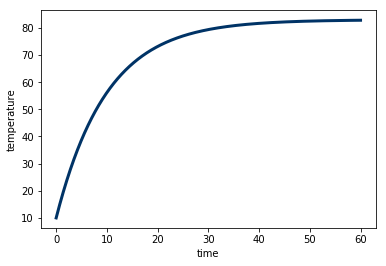

In [9]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
pyplot.xlabel('time')
pyplot.ylabel('temperature');

Alternatively, and in order to re use code in future problems, we could have created a function.

In [10]:
def euler(y, f, dx):
    """Computes y_new = y + f*dx
    
    Parameters
    ----------
    y  : float
        old value of y_n at x_n
    f  : float
        first derivative f(x,y) evaluated at (x_n,y_n)
    dx : float
        x step
    """
    
    return y + f*dx

In [11]:
T = T0
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T


Actually, for this particularly simple case, calling a function may introduce unecessary overhead, but it is a an example that we will find useful for future applications. For a simple function like this we could have used a "lambda" function (more about lambda functions <a href="http://www.secnetix.de/olli/Python/lambda_functions.hawk">here</a>).

In [12]:
euler = lambda y, f, dx: y + f*dx 

Now, let's study the effects of different time steps on the convergence:

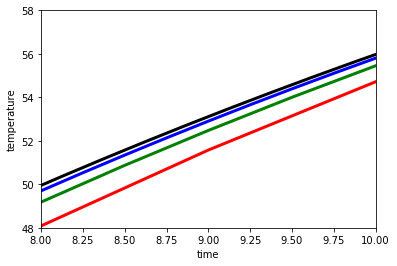

In [13]:
dt = 1.
#my_color = ['#003366','#663300','#660033','#330066']
my_color = ['red', 'green', 'blue', 'black']
for j in range(0,4):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(1,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
        
    pyplot.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3)
    dt = dt/2.

pyplot.xlabel('time');
pyplot.ylabel('temperature');
pyplot.xlim(8,10)
pyplot.ylim(48,58);

### Challenge 2.1

To properly study convergence, one possibility it so look at the result at a given time, for different time steps. Modify the previous program to print the temperature at $t=10$ as a function of $\Delta t$. 

Higher order: Taylor’s series
-----------------------------

We can go a step beyond Euler’s method keeping up to second order terms
in the expansion around $x_0$. Doing so we obtain
$$y(x+\Delta x)=y(x)+y'(x)\Delta x+\frac{1}{2}y''(x)(\Delta x)^2+O(\Delta 
x^3)
$$ from the ODE we get $$\begin{eqnarray}
y'(x)&=&f(x,y), \\
y''(x)&=&\frac{df}{dx}=\frac{\partial f}{\partial x}+\frac{\partial 
f}{\partial y}\frac{dy}{dx}=\frac{\partial f}{\partial 
x}+\frac{\partial f}{\partial y} f \end{eqnarray}$$

Substituting in the Taylor expansion we obtain

$$y_{n+1}=y_n+f\Delta x+\frac{1}{2}(\Delta x)^2[\frac{\partial 
f}{\partial x}+f\frac{\partial f}{\partial y}]+O(\Delta x^3),$$

where all the functions and derivatives are evaluated in $(x_n,y_n)$.

Multistep or Predictor-Corrector methods
----------------------------------------

We can achieve higher accuracy by relating $y_{n+1}$ not only to $y_n$,
but also to points further in the past $y_{n-1},y_{n-2},...$ To derive
such formulas we can formally integrate exactly the equation of motion to obtain:
$$y_{n+1}=y_n+\int_{x_n}^{x_{n+1}}f(x,y)dx$$

The problem is that we don’t know $f(x,y)$ over the interval
$(x_n,x_{n+1})$. However, we can use the values of $y$ at $x_n$ and
$x_{n-1}$ to provide a linear extrapolation:
$$f=\frac{(x-x_{n-1})}{\Delta x}f_n-\frac{(x-x_n)}{\Delta x} 
f_{n-1}+O(\Delta x^2),$$ with $f_n=f(x_n,y_n)$. Inserting into
the integral we obtain
$$y_{n+1}=y_n+\Delta x(\frac{3}{2}f_n-\frac{1}{2}f_{n-1})+O(\Delta x^3)$$
Note that the value of $y_0$ is not sufficient information to get this
algorithm started. The value of $y_1$ has to be obtained first by some
other procedure, like the ones described previously. This means that the
method is not **"self starting"**.

Runge-Kutta methods
-------------------

### 2nd order Runge-Kutta

Euler’s method rests on the idea that the slope at one point can be used
to extrapolate to the next. A plausible idea to make a better estimate
of the slope is to extrapolate to a point halfway across the interval,
and then to use the derivative at this point to extrapolate across the
whole interval. Thus,

$$\begin{eqnarray}
k&=&\Delta x f(x_n,y_x), \\
y_{n+1}&=&y_n+\Delta x f(x+\Delta x/2, y_n+k/2) + O(\Delta 
x^3).\end{eqnarray}$$

It has the same accuracy as the Taylor series. It requires
the evaluation of $f$ twice for each step.

### 4th order Runge-Kutta

Similar ideas can be used to derive a 3rd or 4th order Runge-Kutta
method. It has been found by experience that the best balance between
accuracy and computational effort is given by a fourth-order algorithm.
Such a method would require evaluating $f$ four times at each step, with
a local accuracy of $O(\Delta x^5)$. It can be written as follows:
$$\begin{eqnarray}
 k_1&=&\Delta x f(x_n,y_n), \\
 k_2&=&\Delta x f(x_n+\Delta x/2,y_n+k_1/2), \\
 k_3&=&\Delta x f(x_n+\Delta x/2,y_n+k_2/2), \\
 k_4&=&\Delta x f(x_n+\Delta x,y_n+k_3), \\
 y_{n+1}&=&y_n+\frac{1}{6}(k_1+2k_2+2k_3+k_4)+O(\Delta x^5).\end{eqnarray}$$

Runge-Kutta method are self-staring, meaning that they can be used to
obtain the first few iterations for a non self-starting algorithm.

### Challenge 2.2

Repeat the calculation in Challenge 2.1 using 4th order Runge-Kutta